# Demand Forecast Analysis

# Business Overview


*  This project aims to enhance demand forecasting accuracy for a retail business by leveraging historical sales data across multiple product categories. Accurate demand forecasting is critical for optimizing inventory management, reducing stockouts and overstock situations, and improving overall supply chain efficiency. By analyzing monthly demand patterns for categories such as Grocery, Apparel, Toys, Electronics, and Home & Kitchen, the project utilizes data cleaning, transformation, and machine learning techniques to predict future demand. The resulting forecasts support data-driven decision-making, enabling the business to better align procurement, production, and sales strategies with anticipated market needs.

In [1]:
#import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Data Cleaning

In [2]:
#load the dataset
data = pd.read_csv(r'C:\Users\Rebecca\Desktop\Demand forecast analysis\Data\abc_xyz_dataset.csv')
data.head()

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [3]:
#check unique values in category column
unique_products = data['Category'].unique()
unique_products.tolist()

['Grocery', 'Apparel', 'Toys', 'Electronics', 'Home & Kitchen']

In [4]:
#info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

In [5]:
#summary statistics of the dataset
data.describe()

,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,1418.515000,1418.394000,1421.23900,1409.242000,1411.762000,1412.853000,1410.558000,1403.721000,1411.109,1411.700000,1413.422000,1419.38100,16961.896000,57.358000,1.072288e+06
std,1489.352997,1488.076126,1496.49987,1489.280958,1488.620593,1490.568779,1497.772702,1484.283184,1482.689,1484.762652,1482.821287,1496.14098,17788.477345,155.110913,4.087477e+06
min,24.000000,7.000000,2.00000,8.000000,9.000000,15.000000,6.000000,2.000000,2.000,11.000000,9.000000,4.00000,581.000000,2.000000,1.228000e+03
25%,282.750000,279.000000,278.00000,278.000000,280.000000,277.750000,267.000000,283.000000,282.000,277.000000,275.750000,283.00000,3369.500000,2.000000,1.661900e+04
50%,539.500000,558.000000,591.50000,558.000000,541.500000,598.000000,555.000000,550.500000,547.000,591.000000,608.000000,562.00000,6737.500000,10.000000,7.283600e+04
75%,2478.500000,2529.250000,2515.75000,2427.000000,2461.250000,2451.500000,2547.500000,2407.750000,2472.750,2492.500000,2406.250000,2422.00000,29874.500000,50.000000,3.782425e+05
max,5276.000000,5171.000000,5271.00000,5186.000000,5384.000000,5462.000000,5504.000000,5219.000000,5240.000,5189.000000,5255.000000,5180.00000,59967.000000,1000.000000,5.946200e+07


In [6]:
#check for missing values
print(data.isnull().sum())

Item_ID               0
Item_Name             0
Category              0
Jan_Demand            0
Feb_Demand            0
Mar_Demand            0
Apr_Demand            0
May_Demand            0
Jun_Demand            0
Jul_Demand            0
Aug_Demand            0
Sep_Demand            0
Oct_Demand            0
Nov_Demand            0
Dec_Demand            0
Total_Annual_Units    0
Price_Per_Unit        0
Total_Sales_Value     0
dtype: int64


In [7]:
#check for duplicated values
print(data.duplicated().sum())

0


* The dataset contains 1000 entries with 18 columns. Key columns include monthly demand from January to December, total annual units, price per unit, and total sales value. The monthly demand columns are integers.

In [8]:
#save the cleaned dataset
data.to_csv(r'C:\Users\Rebecca\Desktop\Demand forecast analysis\Data\cleaned_abc_xyz_dataset.csv', index=False)

 * next i will reshape the data to a time series format with months and demand values, then apply the regression model.

In [9]:
# Reshape the data to have a time series format for demand forecasting
demand_columns = [col for col in data.columns if 'Demand' in col and col != 'Total_Annual_Units']
demand_data = data[['Category', 'Total_Annual_Units'] + demand_columns]
demand_data = demand_data.melt(id_vars=['Category', 'Total_Annual_Units'], 
                                 var_name='Month', 
                                 value_name='Demand')
print(demand_data.head())

  Category  Total_Annual_Units       Month  Demand
0  Grocery               53776  Jan_Demand    4516
1  Grocery               57453  Jan_Demand    4792
2  Apparel                1576  Jan_Demand      61
3  Apparel               11305  Jan_Demand    1145
4  Grocery               19833  Jan_Demand    1494


In [10]:
# Melt the dataframe to have 'Month' and 'Demand' columns
data_melted = data.melt(id_vars=['Item_ID', 'Item_Name', 'Category', 'Price_Per_Unit'],
                    value_vars=demand_columns,
                    var_name='Month',
                    value_name='Demand')
print(data_melted.head())

   Item_ID      Item_Name Category  Price_Per_Unit       Month  Demand
0  ITM_001   Surface Near  Grocery              10  Jan_Demand    4516
1  ITM_002    Central Him  Grocery             100  Jan_Demand    4792
2  ITM_003   Win Everyone  Apparel               2  Jan_Demand      61
3  ITM_004      Task Save  Apparel               2  Jan_Demand    1145
4  ITM_005  Hotel Teacher  Grocery              10  Jan_Demand    1494


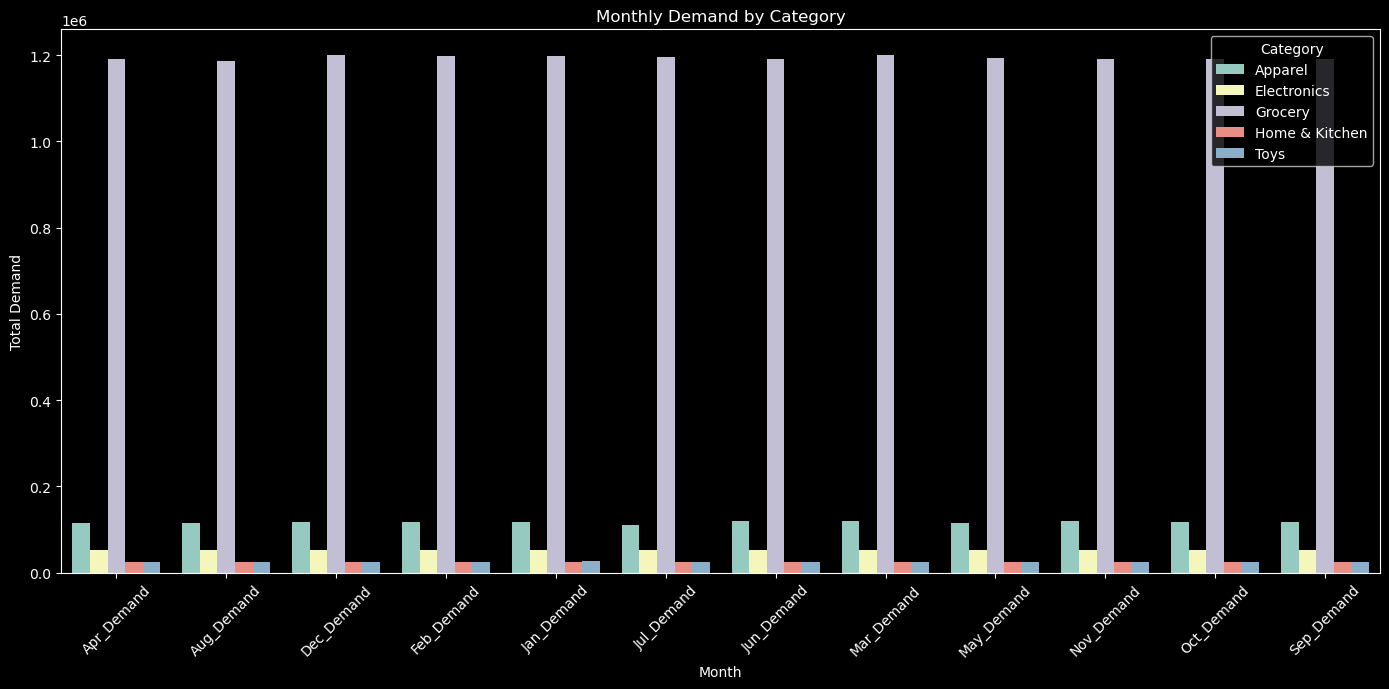

In [21]:
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(data=historical_agg, x='Month', y='Demand', hue='Category')
plt.title('Monthly Demand by Category')
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

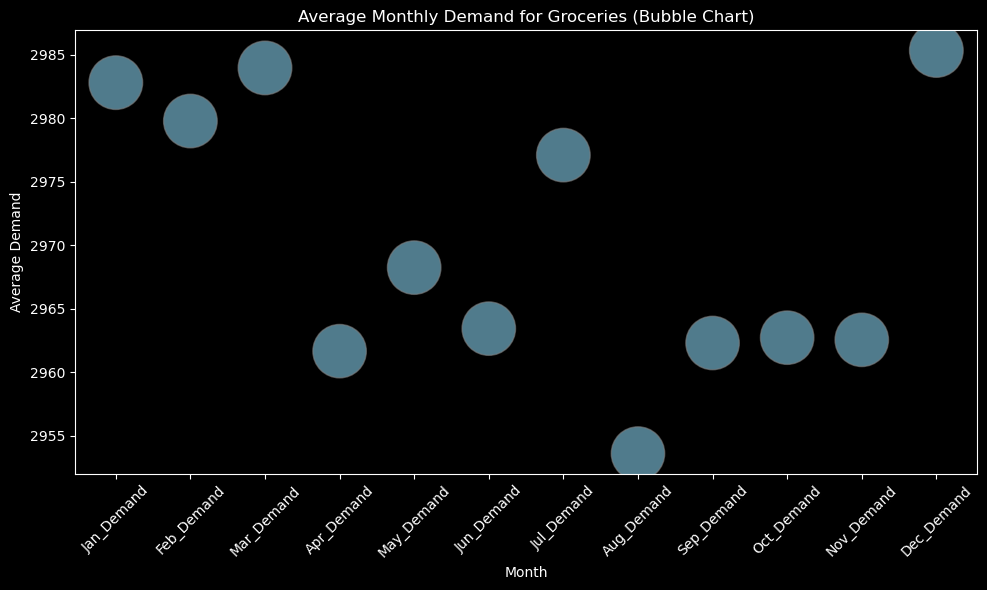

In [23]:
# Bubble chart for average monthly demand of groceries
plt.figure(figsize=(10, 6))
sizes = avg_monthly_grocery.values  # Bubble size based on average demand
plt.scatter(
    avg_monthly_grocery.index,
    avg_monthly_grocery.values,
    s=sizes / 2,  # Adjust size for better visualization
    alpha=0.6,
    color='skyblue',
    edgecolors='grey'
)
plt.title('Average Monthly Demand for Groceries (Bubble Chart)')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Insight : December to February have the highest monthly grocery demand.

* The data has been reshaped into a time series format with columns for Item_ID, Item_Name, Category, Price_Per_Unit, Month, and Demand.

In [11]:
#save the data cleaning and reshaped data
data_melted.to_csv(r'C:\Users\Rebecca\Desktop\Demand forecast analysis\Notebooks\reshaped_abc_xyz_dataset.csv', index=False)

In [12]:
#save data cleaning notebook
notebook_path = r'C:\Users\Rebecca\Desktop\Demand forecast analysis\Notebooks\data_cleaning_abc_xyz.ipynb'

* Next, I will build a linear regression model to forecast the monthly demand. To keep it manageable, I will create a model for the total monthly demand across all items combined

# Data Preprocessing

In [13]:
#aggregate total Demand by Month and Category
demand_agg = data_melted.groupby(['Month', 'Category'])['Demand'].sum().reset_index()
 
print(demand_agg.head())

        Month        Category   Demand
0  Apr_Demand         Apparel   116146
1  Apr_Demand     Electronics    52148
2  Apr_Demand         Grocery  1190590
3  Apr_Demand  Home & Kitchen    24861
4  Apr_Demand            Toys    25497


In [14]:
# One-hot encode the 'Category' column using demand_agg
category_dummies = pd.get_dummies(demand_agg['Category'], prefix='Category')
Month_dummies = pd.get_dummies(demand_agg['Month'], prefix='Month')

# Concatenate the one-hot encoded columns with the original dataframe
demand_agg = pd.concat([demand_agg, category_dummies, Month_dummies], axis=1)

In [15]:
#check updated datafra
demand_agg.head()

,Month,Category,Demand,Category_Apparel,Category_Electronics,Category_Grocery,Category_Home & Kitchen,Category_Toys,Month_Apr_Demand,Month_Aug_Demand,Month_Dec_Demand,Month_Feb_Demand,Month_Jan_Demand,Month_Jul_Demand,Month_Jun_Demand,Month_Mar_Demand,Month_May_Demand,Month_Nov_Demand,Month_Oct_Demand,Month_Sep_Demand
0,Apr_Demand,Apparel,116146,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,Apr_Demand,Electronics,52148,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Apr_Demand,Grocery,1190590,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,Apr_Demand,Home & Kitchen,24861,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
4,Apr_Demand,Toys,25497,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#save Preprocessed data
demand_agg.to_csv(r'C:\Users\Rebecca\Desktop\Demand forecast analysis\Notebooks\preprocessed_demand_agg.ipynb', index=False)

# Linear Regression Model

We are going to use the Linear Regression model to predict and forecast demand of Categories in the next 6 Month 

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
# Convert month to ordinal for regression
# Extract the month abbreviation and create a datetime for a reference year (e.g., 2023)
demand_agg['Month_Ordinal'] = demand_agg['Month'].str[:3] + '-2023'
demand_agg['Month_Ordinal'] = pd.to_datetime(demand_agg['Month_Ordinal'], format='%b-%Y').apply(lambda x: x.toordinal())

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Category' column
demand_agg['Category'] = label_encoder.fit_transform(demand_agg['Category'])

# Encode the 'Month' column
demand_agg['Month'] = label_encoder.fit_transform(demand_agg['Month'])

In [ ]:
# Define features and target in the dataset
X = demand_agg[['Month', 'Category', 'Demand', 'Category_Apparel', 'Category_Electronics', 'Category_Grocery', 'Category_Home & Kitchen', 'Category_Toys']]
y = demand_agg['Demand']

In [ ]:
#fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
#forecast demand for the next 12 months
future_months = pd.date_range(start='2024-01-01', periods=12, freq='ME')
future_months_ordinal = future_months.map(lambda x: x.toordinal())
future_categories = demand_agg['Category'].unique()


In [ ]:
#create a DataFrame for future predictions
future_data = pd.DataFrame({
    'Month': future_months_ordinal,
    'Category': np.tile(future_categories, len(future_months) // len(future_categories) + 1)[:len(future_months)],
})


In [ ]:
#add one-hot encoded columns for future data
for category in demand_agg['Category'].unique():
    future_data[f'Category_{category}'] = (future_data['Category'] == category).astype(int)
#add the month ordinal column
future_data['Month_Ordinal'] = future_data['Month']

In [ ]:
# Forecast demand for the next 6 months

# Get the last available month ordinal from demand_agg
last_month_ordinal = demand_agg['Month_Ordinal'].max()
last_month_date = pd.Timestamp.fromordinal(last_month_ordinal)

# Generate the next 6 months
future_months = pd.date_range(start=last_month_date + pd.offsets.MonthBegin(1), periods=6, freq='MS')
future_months_ordinal = future_months.to_series().apply(lambda x: x.toordinal()).values

# Get all unique categories as used in training
categories = demand_agg['Category'].unique()

# Prepare the input DataFrame for prediction
future_rows = []
for month_ord, month_dt in zip(future_months_ordinal, future_months):
	for cat in categories:
		row = {
			'Month': cat,  # The model was trained with encoded month as integer, but here 'Month' is category index
			'Category': cat,
			'Demand': 0,  # Placeholder, as in training this is the target, but in X it's a feature (may need to drop)
			'Category_Apparel': cat == 0,
			'Category_Electronics': cat == 1,
			'Category_Grocery': cat == 2,
			'Category_Home & Kitchen': cat == 3,
			'Category_Toys': cat == 4
		}
		future_rows.append(row)

future_X = pd.DataFrame(future_rows)

# The model was trained with 'Month' as encoded integer, so set 'Month' as the correct value
future_X['Month'] = np.repeat(np.arange(len(future_months)), len(categories))
future_X['Demand'] = 0  # Set to 0 or drop if not needed

# Reorder columns to match training
X_cols = ['Month', 'Category', 'Demand', 'Category_Apparel', 'Category_Electronics', 'Category_Grocery', 'Category_Home & Kitchen', 'Category_Toys']
future_X = future_X[X_cols]

# Predict
forecasted_demand = model.predict(future_X)


In [ ]:
# Prepare the forecasted demand DataFrame
future_months = future_months.strftime('%Y-%m').tolist()

months_repeated = np.repeat(future_months, len(categories))
categories_tiled = np.tile(categories, len(future_months))

forecasted_demand_df = pd.DataFrame({
    'Month': months_repeated,
    'Category': categories_tiled,
    'Forecasted_Demand': forecasted_demand
})

forecasted_demand

array([1.81690422e-09, 8.06558593e-10, 2.12089510e-08, 5.55753754e-10,
       6.86929956e-10, 1.81414767e-09, 8.03802046e-10, 2.12061945e-08,
       5.52997207e-10, 6.84173409e-10, 1.81139113e-09, 8.01045500e-10,
       2.12034379e-08, 5.50240661e-10, 6.81416862e-10, 1.80863458e-09,
       7.98288953e-10, 2.12006814e-08, 5.47484114e-10, 6.78660315e-10,
       1.80587803e-09, 7.95532406e-10, 2.11979248e-08, 5.44727567e-10,
       6.75903768e-10, 1.80312149e-09, 7.92775859e-10, 2.11951683e-08,
       5.41971020e-10, 6.73147222e-10])

In [ ]:
#display the forecasted demand
print(forecasted_demand_df.head(10))

     Month  Category  Forecasted_Demand
0  2025-01         0       1.816904e-09
1  2025-01         1       8.065586e-10
2  2025-01         2       2.120895e-08
3  2025-01         3       5.557538e-10
4  2025-01         4       6.869300e-10
5  2025-02         0       1.814148e-09
6  2025-02         1       8.038020e-10
7  2025-02         2       2.120619e-08
8  2025-02         3       5.529972e-10
9  2025-02         4       6.841734e-10


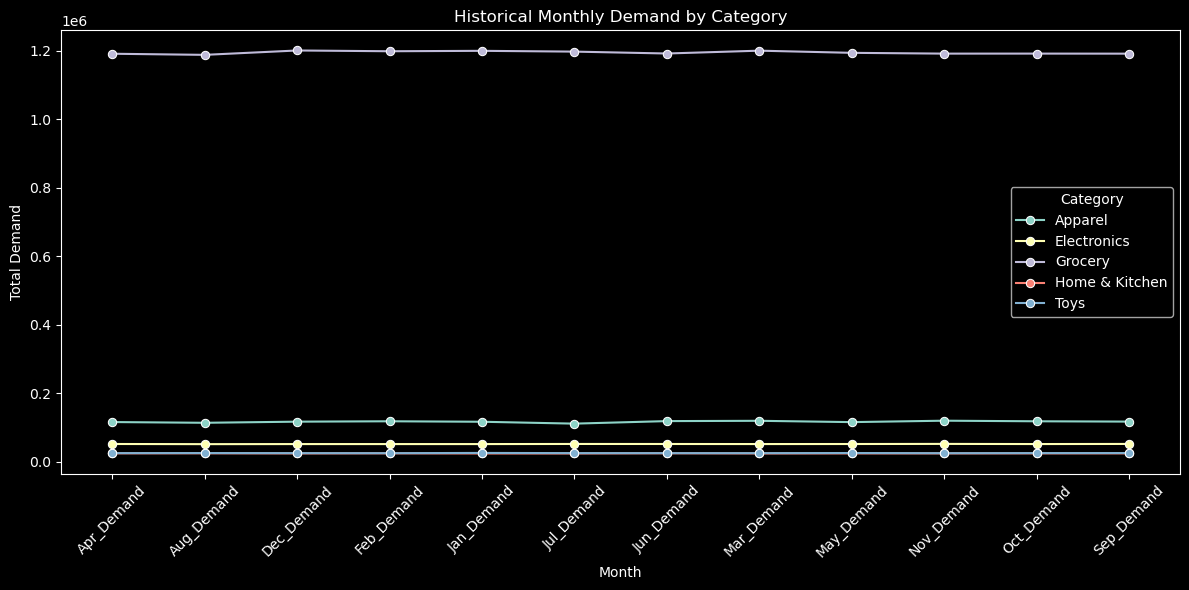

In [20]:
import seaborn as sns

# Aggregate total demand by month and category for historical data
historical_agg = data_melted.groupby(['Month', 'Category'])['Demand'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=historical_agg, x='Month', y='Demand', hue='Category', marker='o')
plt.title('Historical Monthly Demand by Category')
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
#save linear regression model notebook cells 
notebook_path = r'C:\Users\Rebecca\Desktop\Demand forecast analysis\Notebooks\linear_regression_demand_forecast.ipynb'

#save the forecasted demand data
forecasted_demand_df.to_csv(r'C:\Users\Rebecca\Desktop\Demand forecast analysis\Notebooks\forecasted_demand.ipynb', index=False)